# Tarea de Regresión Lineal
#### Sergio Adrian Martínez Tena

Este documento pretende obtener un modelo de regresión múltiple a partir de la base de datos de [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), con esto se pretende utilizar los atributos de 'Temperatura (C)' y 'Pressure (millibars)' para predecir el atributo 'Humidity'.\
En la primera parte del documento se hace una exploración simple a los datos y la segunda parte presenta la construcción del modelo de regresión múltiple.

### 1) Revisar los datos y clasificar el tipo de variables: Observar distribuciones, Revisar qué variables son colineales

#### Se importan las librerias necesarias para el ejercicio

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

#### Se cargan la base de datos

In [2]:
weatherDataComplete = pd.read_csv('weatherHistory.csv')

#### Una vista rápida a los datos

In [3]:
# Se muestran las primeras 5 instancias con todos los atributos
weatherDataComplete.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Cada instancia dentro del conjunto de datos representa un resumen del clima a cierta hora del día. El conjunto de datos contiene 12 atributos: *Formatted Date, Summary, Precip Type, Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Loud Cover, Pressure (millibars) y Daily Summary.*

In [4]:
# Se obtiene una descripcion simple del conjunto de datos y el tipo de variables
weatherDataComplete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Con estos datos desplegados podemos observar que el conjunto de datos contiene 96453 instancias con 12 atributos (como se mencionó anteriormente). También podemos observar en la columna del atributo *Precip Type* es que 517 instancias no tienen definido uste atributo específico (esto es debido a que de los 96453 solo 95936 no son nulos).

Otra cosa que podemos observar es que el tipo de variable, lo cual está indicado en la columna *Dtype*, donde *object* es una variable categórica y *float64* una variable numérica. Por lo que para este conjunto de datos:

4 Variables categóricas: 
- Formatted Date
- Summary
- Precip Type

8 variables son numéricas
- Temperature (C)           
- Apparent Temperature (C)  
- Humidity                  
- Wind Speed (km/h)         
- Wind Bearing (degrees)    
- Visibility (km)           
- Loud Cover                
- Pressure (millibars) 

In [5]:
# Resumen de las variables numericas
weatherDataComplete.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


#### Observar distribuciones

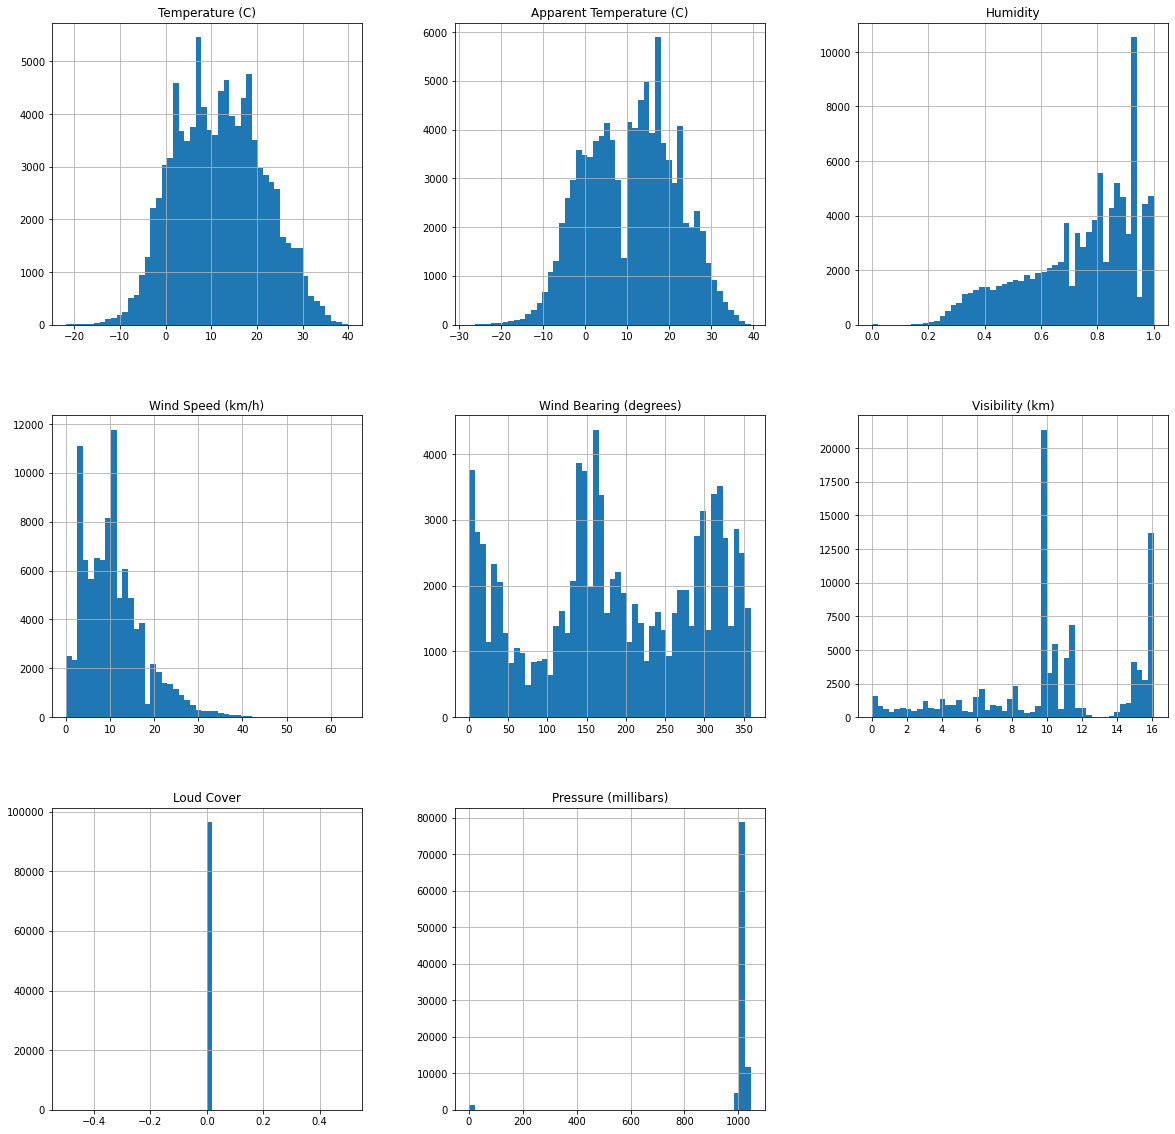

In [6]:
# Se grafican los histogramas de cada variable numerica
weatherDataComplete.hist(bins=50,figsize=(20,20));

En los histogramas pasados se puede observar:
1. La mayor parte de los datos se concentran donde *Temperature (C)* esta entre 0 y 20.
2. El rango de *Apparent Temperature (C)* es un poco mas grande que el de *Temperature (C)*.
3. La distribucion del atributo *Humidity* esta sesgado a la derecha.
4. La distribucion del atributo *Wind Speed (km/h)* esta sesgado a la izquierda.
5. Todos los valores del atributo *Loud Cover* son cero.

#### Se dividen los datos en datos de entrenamiento y datos de prueba.

In [7]:
# Se toman el 80% de los datos y se separan el otro 20% para los datos de prueba
trainWeatherData = weatherDataComplete.sample(frac=0.8, random_state=1)
# Se toman el 20% restante como los datos de prueba
testWeatherData = weatherDataComplete.drop(trainWeatherData.index)

La division de los datos se realiza antes de seguir mas adelante con la visualizacion de los datos en busca de variables colineales.

#### Revisar qué variables son colineales

Para este punto se utiliza el coeficiente de Pearson para observar que tan correlacionados estan los atributos numericos. Esto con el fin de cuantificar el grado en que las variables pudieran ser dependientes una de otra.

In [8]:
# Se calcula el el coeficiente de correlacion de pearson
trainWeatherData.corr(method='pearson')

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992628,-0.630546,0.008914,0.031174,0.391586,NaN,-0.006802
Apparent Temperature (C),0.992628,1.000000,-0.600656,-0.056712,0.030303,0.380603,NaN,-0.001394
Humidity,-0.630546,-0.600656,1.000000,-0.225831,0.001371,-0.366998,NaN,0.008092
Wind Speed (km/h),0.008914,-0.056712,-0.225831,1.000000,0.103054,0.098052,NaN,-0.051590
Wind Bearing (degrees),0.031174,0.030303,0.001371,0.103054,1.000000,0.046144,NaN,-0.011344
Visibility (km),0.391586,0.380603,-0.366998,0.098052,0.046144,1.000000,NaN,0.058656
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.006802,-0.001394,0.008092,-0.051590,-0.011344,0.058656,NaN,1.000000


Sabemos que una correlación positiva implica una correlación que a medida que una variable aumenta la otra también lo hace, un coeficiente de correlación negativo implica que a medida que una variable incrementa la otra disminuye. Por último sabemos que un valor cercano a cero implica que no hay dependencia entre las dos variables.

Observando la tabla de correlación podemos observar que *Temperature (C)* está fuertemente correlacionada con *Apparent Temperature (C)*, lo cual tiene sentido. 

Pero conviene centrarnos en las variables que vamos a utilizar para nuestro regresor lineal múltiple, donde podemos observar que *Temperature (C)* y *Pressure (millibars)* (las dos variables independientes a utilizar) tiene un coeficiente de correlación muy bajo (-0.005447), lo que indica que no hay una relación fuerte entre los dos atributos.

En cambio, vemos que *Temperature (C)* y *Humidity* tienen un coeficiente de correlación alto y negativo (-0.632255), lo cual puede ser un indicador que es una buena idea emplear *Temperature (C)* para predecir *Humidity*.

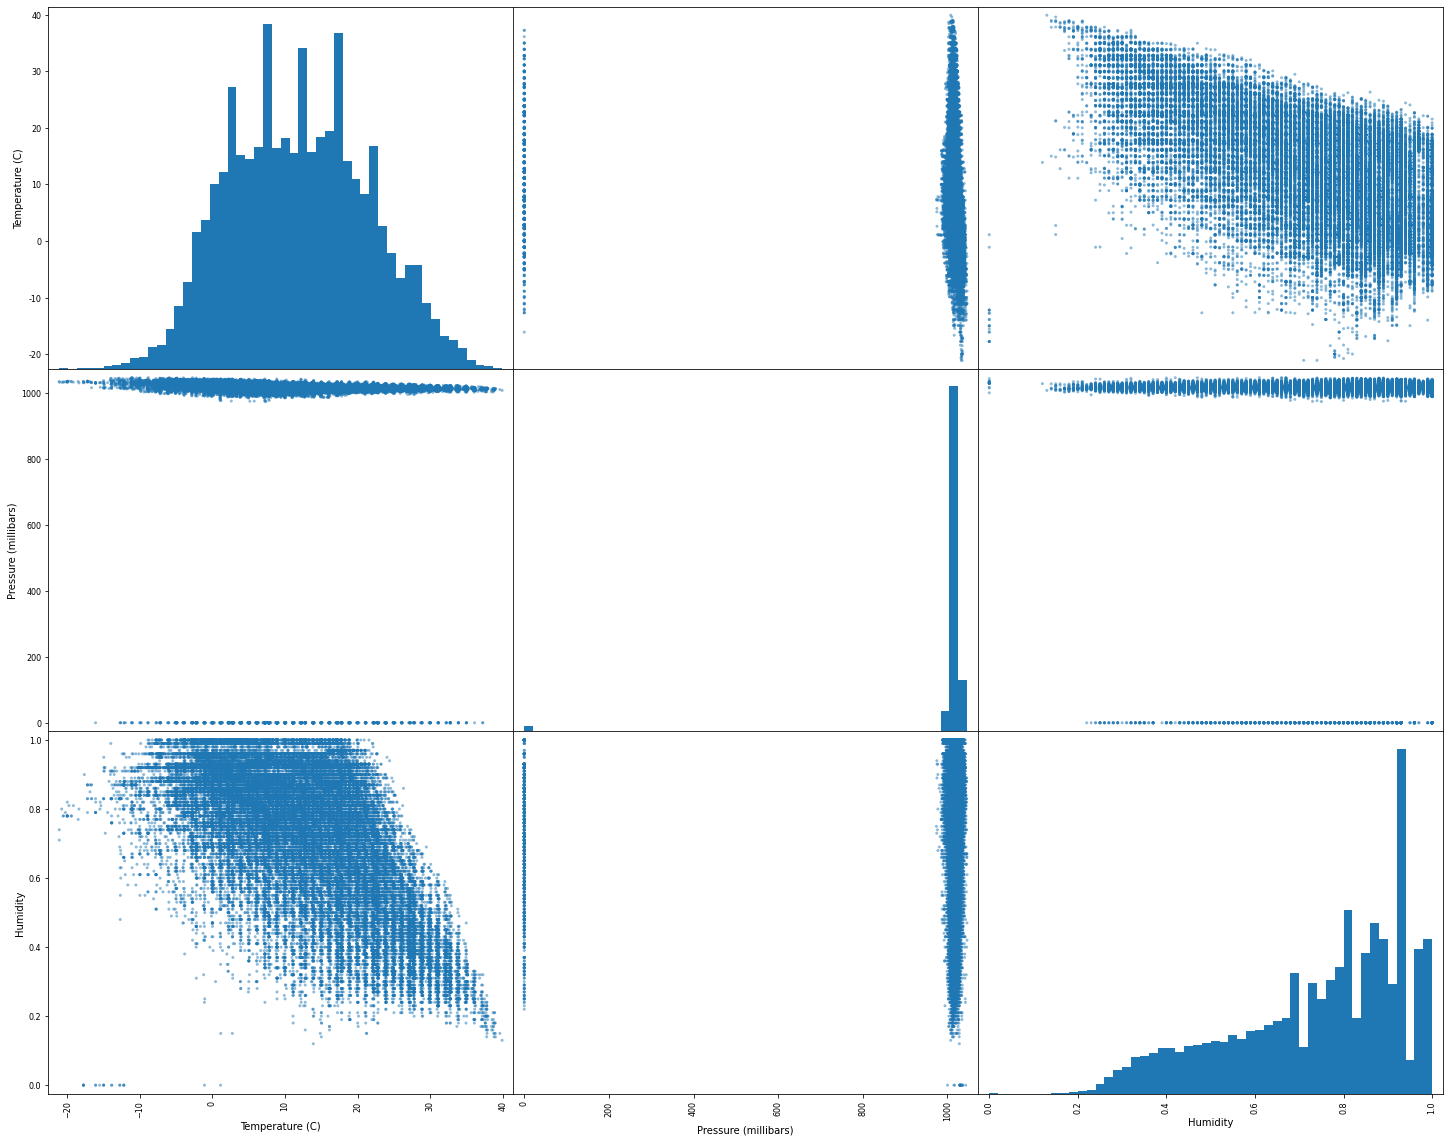

In [9]:
# Se grafican los atributos a utilizar en graficas de dispersion
atributes = ['Temperature (C)','Pressure (millibars)','Humidity']
pd.plotting.scatter_matrix(trainWeatherData[atributes], figsize=(25,20), hist_kwds={'bins':50});

Estas últimas gráficas muestran como hay una tendencia de *Humidity* de bajar conforme *Temperature (C)* sube. También como no hay una relación muy clara de *Pressure (milibars)* y *Humidity*.

#### Se grafican las 3 variables juntas

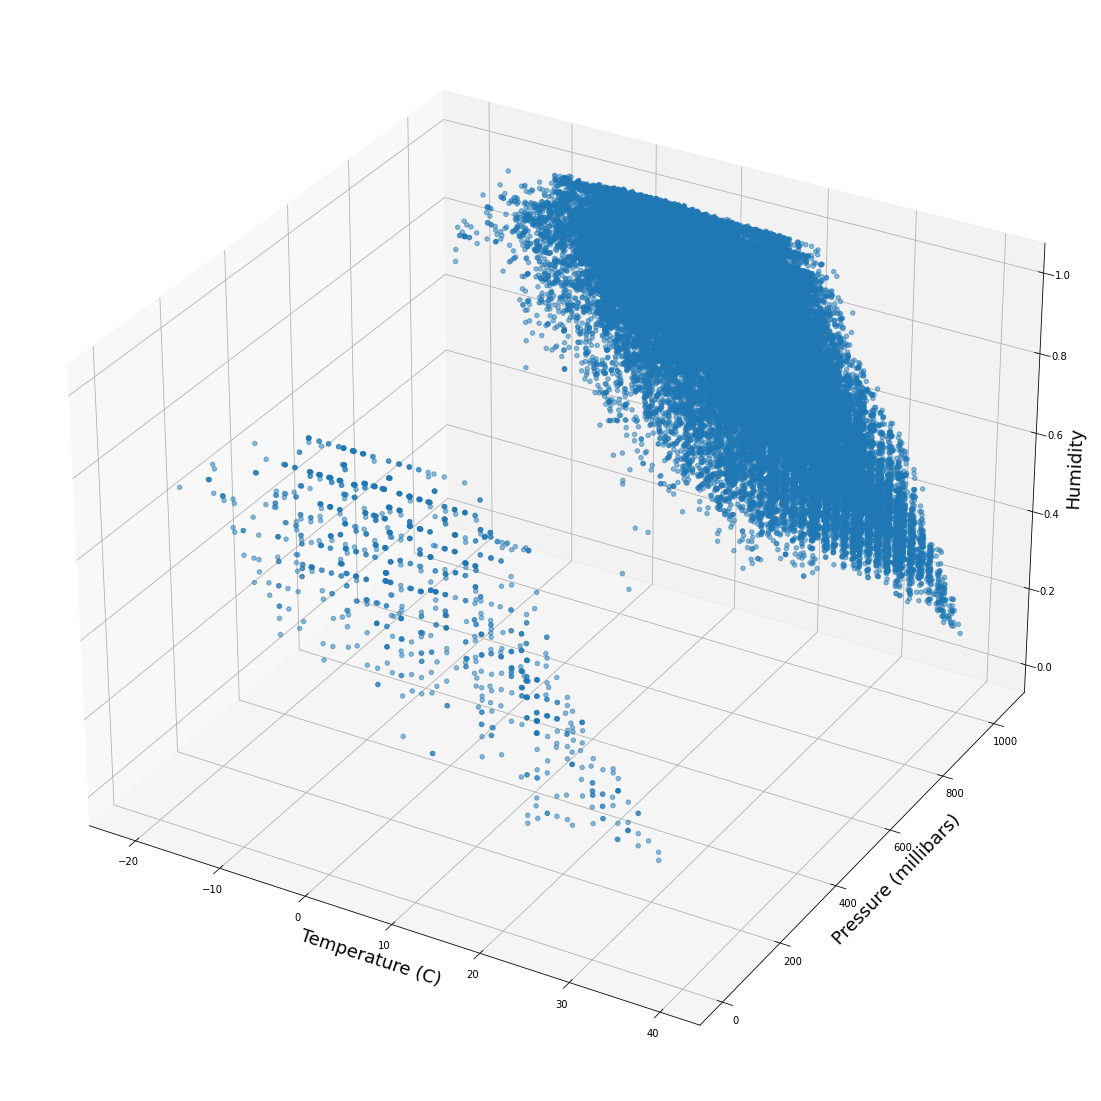

In [10]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
x = np.array(trainWeatherData['Temperature (C)'])
y = np.array(trainWeatherData['Pressure (millibars)'])
z = np.array(trainWeatherData['Humidity'])
ax.scatter3D(x, y, z, 'gray', alpha=0.5);
ax.set_xlabel('Temperature (C)',fontdict={'size':18})
ax.set_ylabel('Pressure (millibars)',fontdict={'size':18})
ax.set_zlabel('Humidity',fontdict={'size':18});

### 2) Generar un modelo de regresión múltiple para estimar el valor de la humedad en función de la presión y la temperatura: H(P,T)

#### Se importan las librerias necesarias para el ejercicio

In [11]:
# Libreria Aprendizaje Computacional
import AC

#### Se seleccionan solo los atributos a utilizar en el modelo

In [12]:
# Se toman las variables independientes del conjunto de datos de entrenamiento
X_train = trainWeatherData[['Temperature (C)','Pressure (millibars)']]
# Se toman las variables dependientes del conjunto
y_train = trainWeatherData[['Humidity']]

In [13]:
# Se muestran las primeras 5 instancias de los datos de entrenamiento (entradas)
X_train.head()

,Temperature (C),Pressure (millibars)
9597,18.938889,1008.04
26204,24.122222,1012.41
6282,20.088889,1019.48
92330,14.466667,1011.14
51067,9.716667,1023.45


In [14]:
# Se muestran las primeras 5 instancias de los datos de entrenamiento (valores objetivos)
y_train.head()

,Humidity
9597,0.84
26204,0.46
6282,0.60
92330,0.99
51067,0.67


#### Entrenamiento del modelo (Descenso del gradiente)

In [38]:
# Se crea el objeto de regresor lineal multiple
multLinearReg = AC.LinearRegression()

Linear Ressor Created


In [39]:
# Se entrena el modelo de regresion Lineal Multiple
multLinearReg.train(X_train, y_train, normalize=True, eta=0.01)

In [40]:
# Se obtienen los valores de nuestros coeficinetes finales
multLinearReg.coeff

array([[ 0.2857856 ],
       [-0.15348707],
       [ 0.54813826]])

#### Comportamiento de la función de Costo

Costo Inicio: 0.4842752490876464
Costo Final: 0.19099927808210837


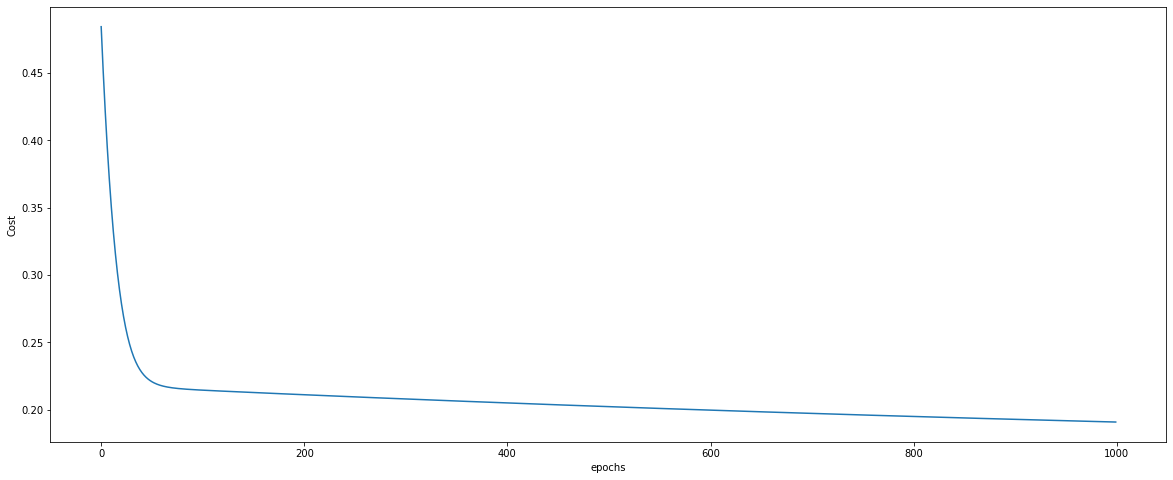

In [41]:
# Se grafica la funcion de costo durante cada iteracion del descenso del gradiente
plt.figure(figsize=(20,8))
plt.plot(multLinearReg.costHistory);
plt.xlabel('epochs');
plt.ylabel('Cost');
print(f'Costo Inicio: {multLinearReg.costHistory[0]}')
print(f'Costo Final: {multLinearReg.costHistory[-1]}')

#### Cross Validation K-fold = 10

![crossValidation](cv.gif)

In [19]:
model = AC.LinearRegression()
costs, costMean, costStd, coeff = AC.crossValidation(model, X_train, y_train, k=10, normalize=True, eta=0.01)

Linear Ressor Created


In [20]:
print('Costos:', costs)
print('\nMedia del costo:', costMean)
print('Desviación estandar del costo:', costStd)
print('\nMejores Coeficientes:\n',coeff)

Costos: [0.20196648 0.18444052 0.19630669 0.20868788 0.22411863 0.20967823
 0.19641231 0.19425231 0.2041139  0.1873991 ]

Media del costo: 0.2007376046751542
Desviación estandar del costo: 0.011075354170786941

Mejores Coeficientes:
 [[ 0.3710942 ]
 [-0.18673074]
 [ 0.47872193]]


#### Generar curvas de aprendizaje

In [21]:
model = AC.LinearRegression()
train_errors, val_errors = AC.getLearningCurves(multLinearReg, X_train[:5000], y_train[:5000], normalize=True, eta=0.01)

Linear Ressor Created


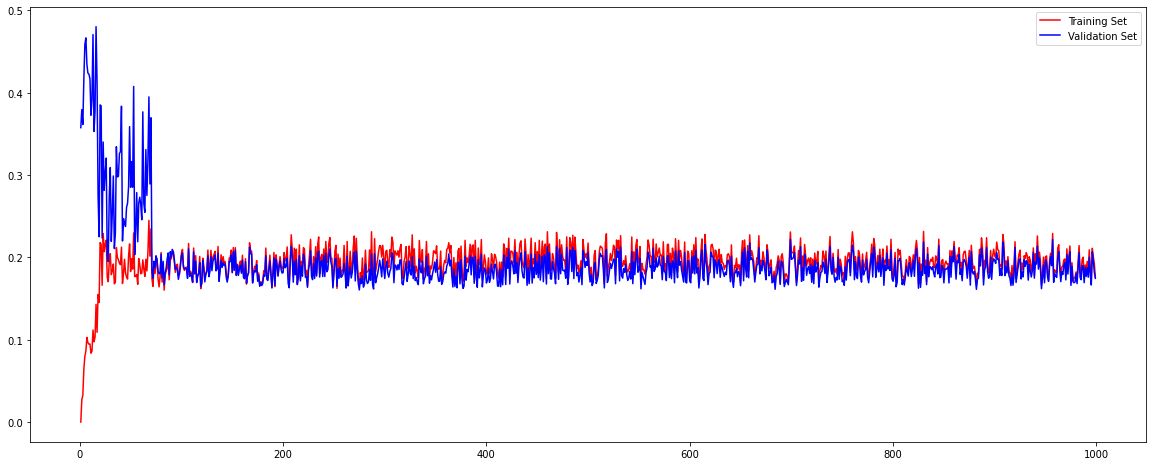

In [22]:
plt.figure(figsize=(20,8))
plt.plot(train_errors[:1000], 'r', label='Training Set')
plt.plot(val_errors[:1000], 'b', label='Validation Set');
plt.legend()
#plt.yticks(np.arange(0, 10, step=1));

Debido a que las curvas de aprendizaje siguen la misma tendencia después de cierto número de instancias, aquí solo se muestran las primeras mil.

#### Evaluando los datos de prueba

Por último se evaluan el modelo final con los datos de prueba, esto se evalua solo calculando las predicciones y comparandolas con los valores reales de prueba.

In [42]:
# Coeficientes del modelo final
multLinearReg.coeff

array([[ 0.2857856 ],
       [-0.15348707],
       [ 0.54813826]])

In [43]:
# Se toman las variables independientes del conjunto de datos de prueba
X_test = testWeatherData[['Temperature (C)','Pressure (millibars)']]
# Se toman las variables dependientes del conjunto
y_test = testWeatherData[['Humidity']]

In [44]:
# Se obtienen las predicciones
finalPredictions = multLinearReg.predict(X_test, normalize=True)

In [45]:
# Se obtienen el error (costo) final
final_mse = AC.meanSquareError(y_test,finalPredictions)
final_cost = np.sqrt(final_mse)
print('Costo en los datos de prueba:',final_cost)

Costo en los datos de prueba: 0.1916332953017654


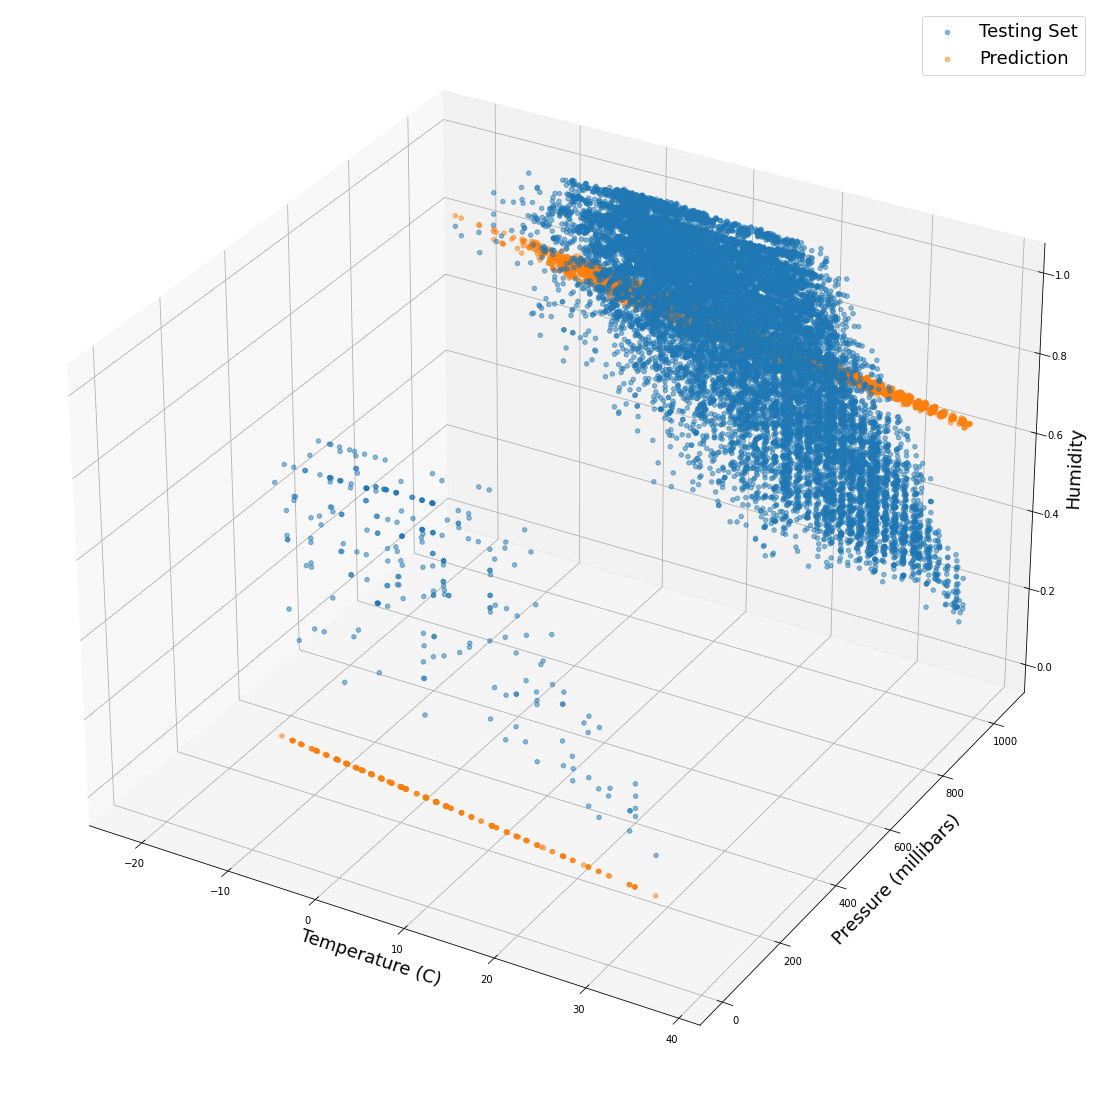

In [46]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
temp = np.array(X_test['Temperature (C)'])
pres = np.array(X_test['Pressure (millibars)'])
humidityReal = np.array(y_test)
humidityPrediction = np.array(finalPredictions)
ax.scatter3D(temp, pres, humidityReal, 'gray', alpha=0.5, label='Testing Set');
ax.scatter3D(temp, pres, humidityPrediction, 'gray', alpha=0.5, label='Prediction');
ax.legend(fontsize=18)
ax.set_xlabel('Temperature (C)',fontdict={'size':18})
ax.set_ylabel('Pressure (millibars)',fontdict={'size':18})
ax.set_zlabel('Humidity',fontdict={'size':18});

#### Correlación entre las predicciones y los datos de prueba

In [83]:
finalOutputs = pd.DataFrame()
finalOutputs['Real Humidity'] = humidityReal.flatten()
finalOutputs['Predicted Humidity'] = humidityPrediction.flatten()
finalOutputs.corr(method='pearson')

,Real Humidity,Predicted Humidity
Real Humidity,1.000000,0.235461
Predicted Humidity,0.235461,1.000000


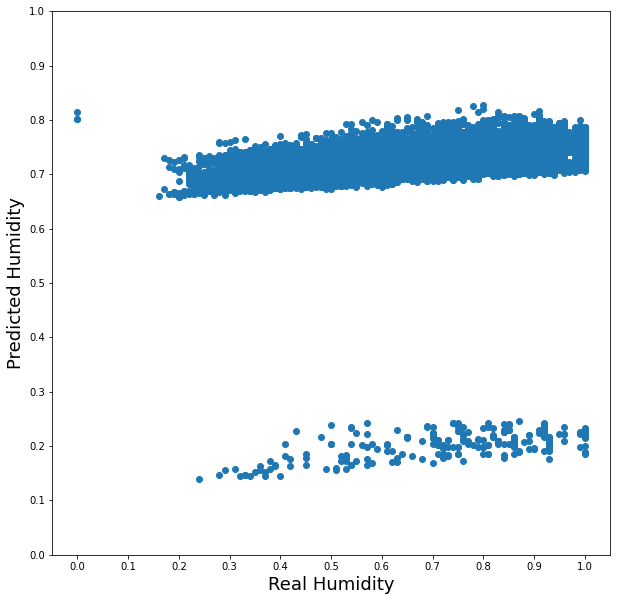

In [90]:
plt.figure(figsize=(10,10))
plt.scatter(x=finalOutputs['Real Humidity'],y=finalOutputs['Predicted Humidity']);
plt.xticks(np.arange(0, 1.1, step=0.1));
plt.yticks(np.arange(0, 1.1, step=0.1));
plt.xlabel('Real Humidity',fontdict={'size':18});
plt.ylabel('Predicted Humidity',fontdict={'size':18});

#### Observar desempeño del modelo ante datos faltantes:
Imputar: (a) media, (b) mediana, (c) valor más frecuente
(d) Eliminar el renglón

Primeramente se hece la funcion que replica lo anteriormente visto, solo con diferentes datos de entrenamiento.

In [47]:
# Se entrena el modelo
def modelTrain(X):
    # Se crea el objeto de regresor lineal multiple
    model = AC.LinearRegression()

    # Se entrena el modelo de regresion Lineal Multiple
    model.train(X, y_train.loc[X.index], normalize=True, eta=0.01)

    # Costos en el entrenamiento
    print(f'Costo Entrenamiento: {multLinearReg.costHistory[-1]}')

    # Se obtienen las predicciones
    finalPredictions = model.predict(X_test, normalize=True)

    # Se obtienen el error (costo) final
    final_mse = AC.meanSquareError(y_test,finalPredictions)
    final_cost = np.sqrt(final_mse)
    print('Costo en los datos de prueba:',final_cost)

    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    # Data for a three-dimensional line
    temp = np.array(X_test['Temperature (C)'])
    pres = np.array(X_test['Pressure (millibars)'])
    humidityReal = np.array(y_test)
    humidityPrediction = np.array(finalPredictions)
    ax.scatter3D(temp, pres, humidityReal, 'gray', alpha=0.1, label='Testing Set');
    ax.scatter3D(temp, pres, humidityPrediction, 'gray', alpha=0.5, label='Prediction');
    ax.legend(fontsize=18)
    ax.set_xlabel('Temperature (C)',fontdict={'size':18})
    ax.set_ylabel('Pressure (millibars)',fontdict={'size':18})
    ax.set_zlabel('Humidity',fontdict={'size':18});

En este punto primero 25% de los datos de entrenamiento pasan a tener un valor no definido.

#### 25% de los datos de 'Temperature (C)' pasan a ser nulos

In [48]:
# Se hace una copia de los datos de entrenamiento
X_train_25p = X_train.copy()

In [49]:
# se toman index aleatorios de los datos de entrenamiento
index_25p = X_train_25p.sample(frac=0.25).index
# se toman los valores de Temperature (C) y se sustituyen por nulos
X_train_25p.loc[index_25p,'Temperature (C)'] = np.nan
X_train_25p

,Temperature (C),Pressure (millibars)
9597,18.938889,1008.04
26204,NaN,1012.41
6282,NaN,1019.48
92330,14.466667,1011.14
51067,9.716667,1023.45
...,...,...
65838,NaN,1012.24
22756,8.261111,1008.67
24201,10.900000,1026.82
64837,6.961111,1016.96


##### (a) Imputar con media

En este punto se utiliza la media (en este caso de *Temperature (C)*) para imputar los datos faltantes.

In [50]:
X_train_25p.mean()

Temperature (C)           11.984419
Pressure (millibars)    1003.153739
dtype: float64

Linear Ressor Created
Costo Entrenamiento: 0.19099927808210837
Costo en los datos de prueba: 0.2221423171504581


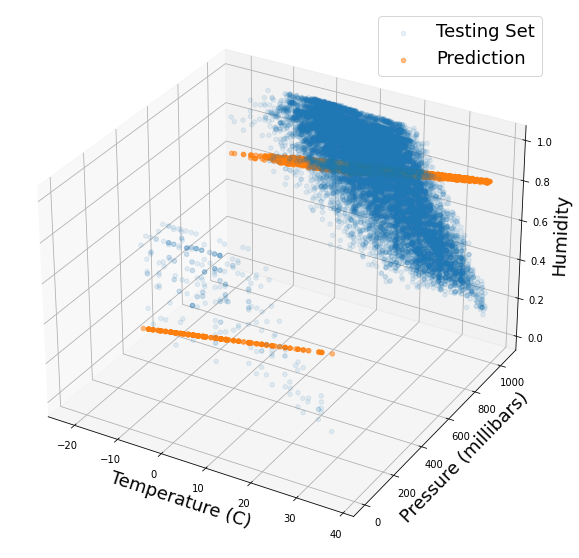

In [51]:
TempMean = X_train_25p['Temperature (C)'].mean()
X_train_25p_mean = X_train_25p.replace(np.nan, TempMean)
modelTrain(X_train_25p_mean)

##### (b) Imputar con mediana

En este punto se utiliza la mediana (en este caso de *Temperature (C)*) para imputar los datos faltantes.

In [52]:
X_train_25p.median()

Temperature (C)           12.083333
Pressure (millibars)    1016.440000
dtype: float64

Linear Ressor Created
Costo Entrenamiento: 0.19099927808210837
Costo en los datos de prueba: 0.23874359435671183


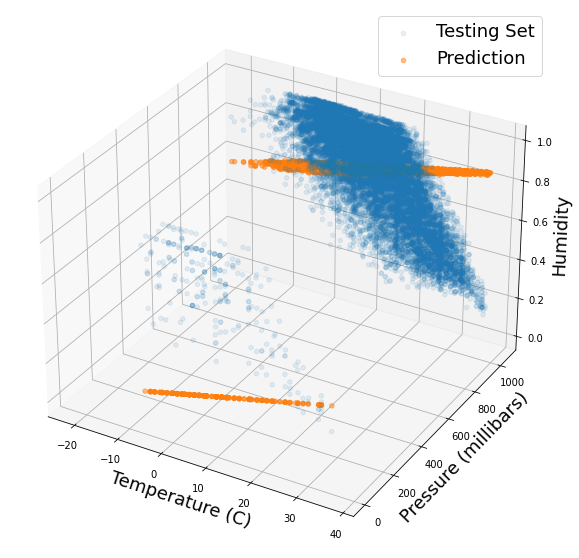

In [53]:
TempMedian = X_train_25p['Temperature (C)'].median()
X_train_25p_median = X_train_25p.replace(np.nan, TempMedian)
modelTrain(X_train_25p_median)

##### (c) Imputar con el valor mas frecuente

En este punto se utiliza la moda (en este caso de *Temperature (C)*) para imputar los datos faltantes.

In [54]:
X_train_25p['Temperature (C)'].mode()

0    7.222222
Name: Temperature (C), dtype: float64

Linear Ressor Created
Costo Entrenamiento: 0.19099927808210837
Costo en los datos de prueba: 0.22125659752749197


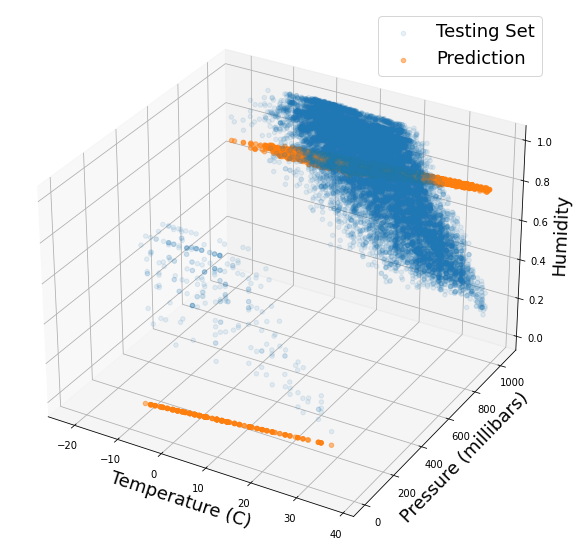

In [55]:
TempMode = float(X_train_25p['Temperature (C)'].mode().values)
X_train_25p_mode = X_train_25p.replace(np.nan, TempMode)
modelTrain(X_train_25p_mode)

##### (d) Se eliminan las instancias con valores no definidos

Linear Ressor Created
Costo Entrenamiento: 0.19099927808210837
Costo en los datos de prueba: 0.18148450122698712


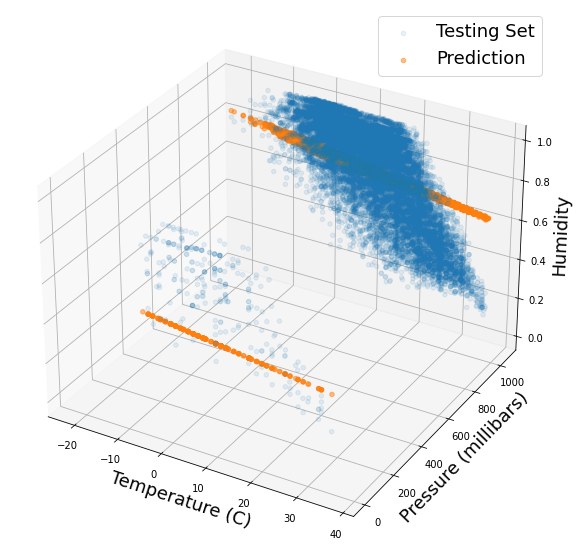

In [58]:
X_train_25p_noNan = X_train_25p.dropna()
modelTrain(X_train_25p_noNan)

En estos últimos ejemplos se puede visualizar que pareciera ser que el método más efectivo (en este problema) es eliminar las instancias que tengan datos indefinidos, ya que como se puede apreciar el modelo sigue generalizando de forma parecida a cuando se utilizan todos los datos. Es importante remarcar que en este caso hay "suficientes" datos para poder realizar esa acción.